# 1. Introduction 

#### Building a healthier world, one byte at a time: Smart strategies for impactful wellness tech.

### STEP 1 : ASK 

#### Fitbit: Data Fuels Growth

Fitbit, a fitness tracking giant, faces a crowded market. Their secret weapon? A vast user data treasure trove. By unlocking its potential, Fitbit can become more than just a tracker: a personalized wellness coach, proactive health advisor, and community builder. Through AI-powered coaching, predictive health alerts, and data-driven partnerships, Fitbit can rewrite its story and lead the personalized health revolution.


####  Fitbit's Power Players:

    1)Visionary CEO: James Park steers the data-driven ship.
    2)Product Architect: Eric Jue crafts features from user insights.
    3)Voice of Value: Amy McDonough shares the data-powered story.
    4)Data Wizards: Scientists unlock the secrets of user behavior.
    5)Future Forgers: R&D team expands the data frontier.
    6)Strategic Allies: Partnerships amplify reach and impact.
    7)Passionate Community: Their data fuels Fitbit's growth.


#### Bussiness Task

Given the previous facts, the business task is defined as searching for user patterns of usage of their smart devices in order to gain insights that would later better orientate marketing decisions. So, in one phrase it would be:

How do our users use our smart devices?. Identify trends in how consumers use non Fitbit smart devices to apply insights into Fitbit’s marketing strategy.


### Step 2: Prepare

#### Dataset used

The data source used for this case study is FitBit Fitness Tracker Data. This dataset is stored in Kaggle and was made available through Mobius and generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016 05.12.2016.


#### Data organization and verification

The dataset is a collection of 18 .csv files. 15 in long format, 3 in wide format. The datasets consists of wide ranging information from activity metrics, calories, sleep records, metabolic equivalent of tasks (METs), heart rate and steps; in timeframes of seconds, minutes, hours and days

#### Data limitations

The data has some limitations which could Undermine the results of the analysis Such limitations to take into consideration are:

    Missing demographics
    Small simple size
    Short time period of Data collection


### Step 3: Process

#### 
Loading libraries

In [25]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings

from pandas.api.types import CategoricalDtype

In [2]:
import os 

files = [file for file in os.listdir('./FitnessTrackerData') ]

for file in files :
    print(file)


dailyActivity_merged.csv
dailyCalories_merged.csv
dailyIntensities_merged.csv
dailySteps_merged.csv
heartrate_seconds_merged.csv
hourlyCalories_merged.csv
hourlyIntensities_merged.csv
hourlySteps_merged.csv
minuteCaloriesNarrow_merged.csv
minuteCaloriesWide_merged.csv
minuteIntensitiesNarrow_merged.csv
minuteIntensitiesWide_merged.csv
minuteMETsNarrow_merged.csv
minuteSleep_merged.csv
minuteStepsNarrow_merged.csv
minuteStepsWide_merged.csv
sleepDay_merged.csv
weightLogInfo_merged.csv


#### Importing datasets

In [3]:
# First, let's import the dataset 'dailyActivity_merged.csv' using the pandas pd.read_csv() function

df = pd.read_csv('./FitnessTrackerData/dailyActivity_merged.csv')
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


#### Data exploration

In [4]:
df.shape

(940, 15)

In [5]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

#### The dataset stores and tracks the data collected on a daily basis, by the FitBit Fitness tracking devices, such as smartwatches and/or fitness apps. From a quick view we can sumarize the columns as the following:

    Id: is an unique identifier of the users in the survey
    ActivityDate: is the specific date of the entry
    TotalSteps: the total steps each user did each day
    TotalDistance: the total distance each user did each day
    TrackerDistance: is the distance the device tracked each day
    LoggedActivitiesDistance: is the distance tracked by the device on specific activities
    VeryActiveDistance: The distance traveled at a very active physical state?
    ModeratelyActiveDistance: The distance traveled at a moderately active physical state?
    LightActiveDistance: The distance traveled at a lightly active physical state?
    SedentaryActiveDistance: The distance traveled at a sedentary kind of active physical state?
    VeryActiveMinutes: The minutes spent at a very active physical state?
    FairlyActiveMinutes: The minutes spent at a fairly active physical state?
    LightlyActiveMinutes: The minutes spent at a lightly active physical state?
    SedentaryMinutes: The minutes spent at a lightly active physical state?
    Calories: Calories burned that specific day



#### Cleaning the data

##### Checking Data types

In [6]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [7]:
# Default to strings for flexibility for the ID column
df['Id'] = df['Id'].astype(str)
# Changing the ActivityDate column to Datetime from object type.
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'],format="%m/%d/%Y")
# After reformating. We double check the data type
df.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

##### Checking column values

In [8]:
df['sum_distance'] = df['VeryActiveDistance'] + df['ModeratelyActiveDistance'] + df['LightActiveDistance'] + df['SedentaryActiveDistance']

df.loc[(df['LoggedActivitiesDistance'] > 0),['TotalDistance','TrackerDistance','LoggedActivitiesDistance','sum_distance']]

,TotalDistance,TrackerDistance,LoggedActivitiesDistance,sum_distance
668,5.27,5.27,1.959596,5.08
689,9.71,7.88,4.081692,9.71
693,9.27,9.08,2.785175,9.26
707,8.72,8.68,3.167822,8.73
711,10.29,9.48,4.869783,10.29
712,9.65,8.60,4.851307,9.65
713,8.24,7.48,3.285415,8.25
717,10.98,9.91,4.930550,10.98
718,10.48,9.50,4.942142,10.48
719,11.31,10.41,4.924841,11.32


In [9]:
df['TotalMinutes'] = df['VeryActiveMinutes'] + df['FairlyActiveMinutes'] + df['LightlyActiveMinutes'] + df['SedentaryMinutes']

##### Renaming Columns

In [10]:
df.columns = df.columns.str.lower()
df.rename(columns = {'trackerdistance':'tracker_distance','activitydate':'activity_date','totalsteps':'total_steps','totaldistance':'total_distance',
       'loggedactivitiesdistance':'logged_activities_distance', 'veryactivedistance':'very_active_distance',
       'moderatelyactivedistance':'moderately_active_distance', 'lightactivedistance':'light_active_distance',
       'sedentaryactivedistance':'sedentary_active_distance', 'veryactiveminutes':'very_active_minutes',
       'fairlyactiveminutes':'fairly_active_minutes','lightlyactiveminutes':'lightly_active_minutes',
       'sedentaryminutes':'sedentary_minutes'}
         ,inplace=True) # make the changes permanent by using inplace=True
print('Double check the name of the columns:')
df.columns

Double check the name of the columns:


Index(['id', 'activity_date', 'total_steps', 'total_distance',
       'tracker_distance', 'logged_activities_distance',
       'very_active_distance', 'moderately_active_distance',
       'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       'sum_distance', 'totalminutes'],
      dtype='object')

##### Creating Columns 

In [11]:
day_of_week = df['activity_date'].dt.day_name()
df['day_of_week'] = day_of_week
df['n_day_of_week'] = df['activity_date'].dt.weekday # 0 represents monday, 6 represents sunday

##### Checking empty cells and null values

In [12]:
#Checking for null values with the function isna().sum()


print('Total number of null values are: ')
print(df.isna().sum())



Total number of null values are: 
id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
sum_distance                  0
totalminutes                  0
day_of_week                   0
n_day_of_week                 0
dtype: int64


In [13]:
# Checking for duplicate entries using the function duplicated().sum()

print('Total number of duplicated values are: ',df.duplicated().sum())


Total number of duplicated values are:  0


##### There are no null values nor duplicated entries

##### Subsetting the data

In [14]:
df = df[['id', 'activity_date', 'total_steps', 'total_distance',
       #'tracker_distance', 'logged_activities_distance',
       #'very_active_distance', 'moderately_active_distance',
       #'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       #'sum_distance','totalminutes', 
       'day_of_week', 'n_day_of_week'
        ]].copy()

##### Category creation

#####  By level of physical activity and device usage

##### Physical activity would follow these arguments:

    Sedentary: less than 6000 daily steps on average
    Active: between 6000 and 12000 daily steps on average
    Very active: more than 12000 daily steps on average

Device usage will follow these arguments:

    Low use: less than 8 hours of use per day.
    Normal use: between 8 and 16 hours of use per day.
    High use: more than 16 hours of use per day.


In [15]:
# first group the data by the id
id_grp = df.groupby(['id'])

# Then  look for the average amount of steps, and sort the results in descending order
id_avg_step = id_grp['total_steps'].mean().sort_values(ascending=False)

# After that,  turn the results into a dataframe
id_avg_step = id_avg_step.to_frame()

# create a new column which tells in which category each user fits into, depending on the average amount of steps
conditions = [
    (id_avg_step <=6000),
    (id_avg_step > 6000) & (id_avg_step < 12000),
    (id_avg_step >= 12000)
] # These are the conditions

values = ['sedentary','active','very_active'] # And here are the name of the values

# create a column with the numpy function, np.select to asign each id a category
id_avg_step['activity_level'] = np.select(conditions,values)

# store the results in a variable to use it in the next step
id_activity_level = id_avg_step['activity_level']

# using a list comprehension to create the column in our original dataset.
# With this list comprehension, retrieve the categories where the index match the id column
df['activity_level'] = [id_activity_level[c] for c in df['id']]

### Step 4: Analyze

#####  checking how many unique id's there are with the function nunique(). And what are those with the unique() function

In [16]:
print('Number of unique values in id column:',df['id'].nunique())
print()
print('List of id values:',df['id'].unique())

Number of unique values in id column: 33

List of id values: ['1503960366' '1624580081' '1644430081' '1844505072' '1927972279'
 '2022484408' '2026352035' '2320127002' '2347167796' '2873212765'
 '3372868164' '3977333714' '4020332650' '4057192912' '4319703577'
 '4388161847' '4445114986' '4558609924' '4702921684' '5553957443'
 '5577150313' '6117666160' '6290855005' '6775888955' '6962181067'
 '7007744171' '7086361926' '8053475328' '8253242879' '8378563200'
 '8583815059' '8792009665' '8877689391']


##### how much they appear in the dataset with value_counts()

In [17]:
print('How many times each id appear in the dataset?')
print(df['id'].value_counts())

How many times each id appear in the dataset?
id
1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64


##### checking the date column, what is the minimum date, maximum date, the days between them, and number of unique dates

In [18]:
print('The min date is:',min(df['activity_date']))
print('The max date is:',max(df['activity_date']))
print('The number of unique dates are:',df['activity_date'].nunique())

The min date is: 2016-04-12 00:00:00
The max date is: 2016-05-12 00:00:00
The number of unique dates are: 31


#####  Now start making an exploratory data analysis

In [19]:
# First we use the describe() function to see some statistics
df.describe()

,activity_date,total_steps,total_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,n_day_of_week
count,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,2016-04-26 06:53:37.021276672,7637.910638,5.489702,21.164894,13.564894,192.812766,991.210638,2303.609574,2.918085
min,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,127.000000,729.750000,1828.500000,1.000000
50%,2016-04-26 00:00:00,7405.500000,5.245000,4.000000,6.000000,199.000000,1057.500000,2134.000000,3.000000
75%,2016-05-04 00:00:00,10727.000000,7.712500,32.000000,19.000000,264.000000,1229.500000,2793.250000,5.000000
max,2016-05-12 00:00:00,36019.000000,28.030001,210.000000,143.000000,518.000000,1440.000000,4900.000000,6.000000
std,NaN,5087.150742,3.924606,32.844803,19.987404,109.174700,301.267437,718.166862,1.942379


#### Step 5 - Share

#### Trend between calories steps and calories

##### What is the correlation between the amount of steps done, and the amount of calories burnt?

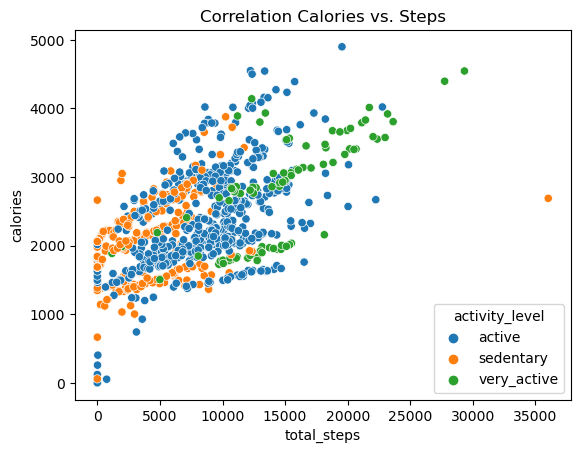

In [26]:
# Ensure 'activity_level' is a categorical dtype
df['activity_level'] = pd.Categorical(df['activity_level'])

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Create the scatter plot using the updated method
ax = sns.scatterplot(x='total_steps', y='calories', data=df, hue='activity_level')

# Add title and display the plot
plt.title('Correlation Calories vs. Steps')
plt.show()

We can see in this scatterplot a somewhat positive correlation, the more steps done, the more calories burnt. Also we divided
the dots by colors, using the activity_level category, so we can see which group is representing the data shown

#####     Average number of steps per day:
    Calculate the mean or average of the total steps recorded each day to find the overall average number of steps per day.

    Daily Step Count Average:
    Determine the mean number of steps taken each day to ascertain the daily average step count.

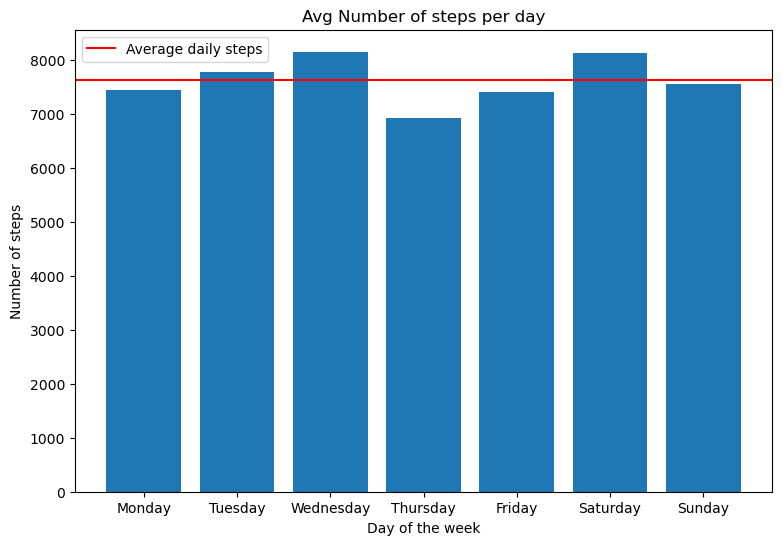

In [27]:
day_of_week = ['Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday','Sunday']
fig, ax =plt.subplots(1,1,figsize=(9,6))

day_grp = df.groupby(['day_of_week'])
avg_daily_steps= day_grp['total_steps'].mean()
avg_steps = df['total_steps'].mean()

plt.bar(avg_daily_steps.index,avg_daily_steps)

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(y=avg_daily_steps.mean(),color='red', label='Average daily steps')
ax.set_ylabel('Number of steps')
ax.set_xlabel('Day of the week')
ax.set_title('Avg Number of steps per day')

plt.legend()
plt.show()

The results show that Monday, Tuesday and Saturday are the days where the users were more physically active and above the average numbert of steps overall. Wednesday, Thursday, and Friday are below the average but the three fell into the same area. Sunday is the least active of all the weekdays.

With this information we can interpret that users tend to be more physically active during the firsts days of the week and during saturdays, giving us a hint of the activities they may do.


##### Percentage of activity in minutes

What percentage of the time are people active?


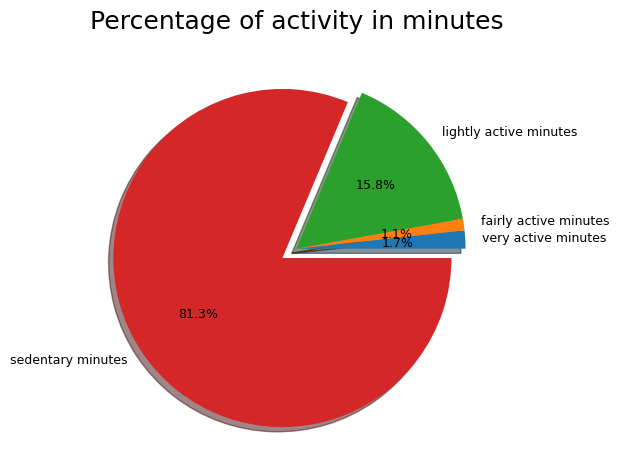

In [28]:
very_active_mins = df['very_active_minutes'].sum() 
fairly_active_mins = df['fairly_active_minutes'].sum()
lightly_active_mins = df['lightly_active_minutes'].sum()
sedentary_mins = df['sedentary_minutes'].sum()

slices = [very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins]
labels = ['very active minutes','fairly active minutes','lightly active minutes','sedentary minutes']
explode = [0,0,0,0.1]
plt.pie(slices, labels = labels, explode = explode, autopct='%1.1f%%',textprops=dict(size=9), shadow=True)

plt.title('Percentage of activity in minutes',fontsize=18)
plt.tight_layout()

plt.show()

##### 

This pie chart shows that the users are in a sedentary state of activity most of the time, a sixth of the time doing light activity and only 2% of the time being active doing proper excercise.


##### Trends Between activity level minutes and calories

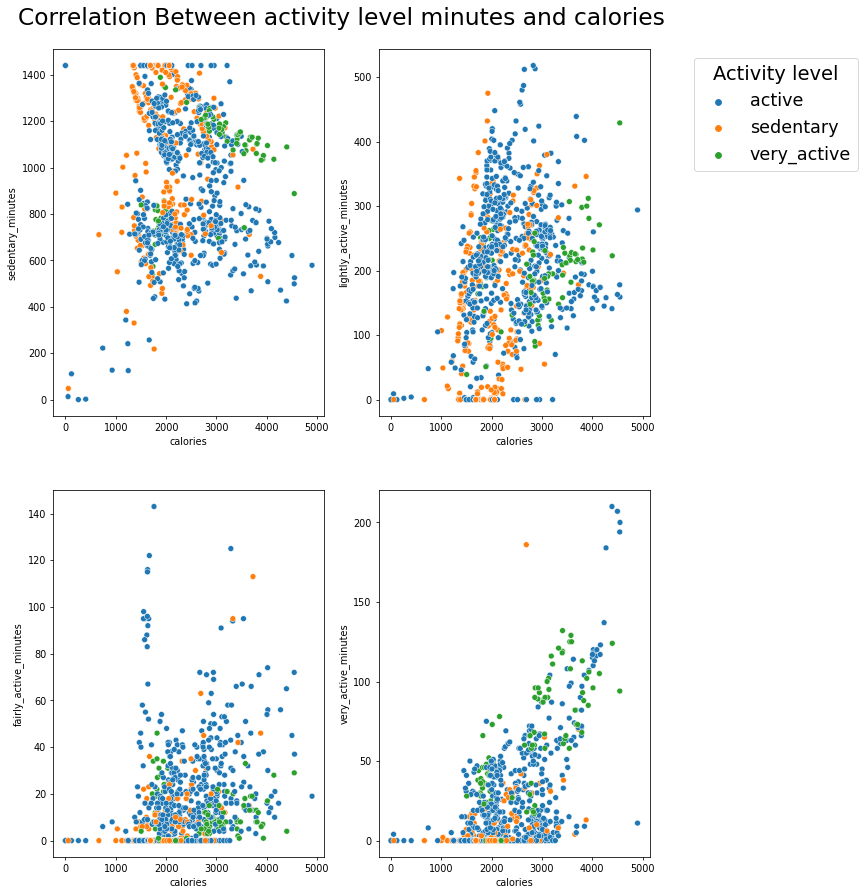

In [30]:
n_day_of_week = [0,1,2,3,4,5,6]

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(11,15),dpi=70)

sns.scatterplot(data=df,x='calories',y='sedentary_minutes',hue='activity_level',ax=axes[0,0],legend=False)

sns.scatterplot(data=df,x='calories',y='lightly_active_minutes',hue='activity_level',ax=axes[0,1],legend=False)

sns.scatterplot(data=df,x='calories',y='fairly_active_minutes',hue='activity_level',ax=axes[1,0],legend=False)

sns.scatterplot(data=df,x='calories',y='very_active_minutes',hue='activity_level',ax=axes[1,1])


plt.legend(title='Activity level',title_fontsize=20,bbox_to_anchor=(1.8,2.2),fontsize=18,frameon=True,scatterpoints=1)
fig.suptitle('Correlation Between activity level minutes and calories',x=0.5,y=0.92,fontsize=24)
plt.show()

#### Step 6 - Act

##### 
After analyzing Fitbit Fitness Tracker Data, we have uncovered valuable insights that could significantly impact Fitbit's marketing strategy.

A Versatile Wearable Device:
Fitbit can communicate to users that their products extend beyond sports and exercise-related activities. The data reveals that users tend to wear the tracking device more on weekends than weekdays, suggesting a potential misperception that Fitbit is solely for sports or casual weekend walks. Fitbit can emphasize that their products are designed to accompany users throughout various daily activities, including work, providing comprehensive tracking capabilities for improved overall fitness and health. This approach aims to appeal to a diverse demographic of women, emphasizing that Fitbit is for all women who prioritize their health.

Incorporating Rewards and Reminders:
Fitbit can integrate features such as rewards, incentives, and reminders within the Fitbit app or other products to motivate users to achieve specific health and fitness goals. These goals may include reaching a minimum of 7,500 steps per day, meeting calorie-burning targets for weight management, or maintaining an 8-hour sleep pattern. Introducing rewards like leaderboards showcasing top users, virtual medals, or exclusive offers can create a sense of achievement and community. Additionally, Fitbit could send notifications to users falling behind on their goals, offering personalized recommendations to assist them in reaching their objectives. This proactive engagement could enhance user motivation and overall satisfaction with Fitbit's products.